In [27]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [28]:
public_df = pd.read_csv('data/public-study/EmoTrak-emotrak-2018-04-19T20_50_09.379Z.csv')

In [29]:
public_df = public_df.replace({'embarrased': 'embarrassed', 'yes': 1, 'no': 0, '60+': 90})

In [30]:
public_df['timestamp'] = pd.to_datetime(public_df['timestamp'], unit='s')

In [38]:
public_df['startTime'] = pd.to_datetime(public_df['timestamp'], unit='s')

In [39]:
pd.set_option('display.max_columns', 999)

In [40]:
public_df.head()

,row_id,user_id,record_id,recordReceived_ISO8601,recordReceived_secondsSinceMidnight1Jan1970UTC,surveyNumber,timestamp,startTime,associatedAlert,responseLagSeconds,dailyAlertNumber,spendingDay,spendingDayOther,sleptFor,tiredness,connectedColleagues,connectedPatients,feelingEmotion,generalEmotion,specificEmotion,otherEmotion,intensity,trigger,generalTrigger,specificTrigger,bodySensationIntensity,bodySensationForehead,bodySensationEyes,bodySensationJaw,bodySensationNeck,bodySensationShoulders,bodySensationChest,bodySensationArms,bodySensationHands,bodySensationStomach,bodySensationBowel,bodySensationLegs,bodySensationFeet,bodySensationLowerBack,bodySensationUpperBack,bodySensationOther,bodySensationOtherLocation,emotionResponse,emotionDuration,emotionResponseHelpful,selfCareEatingWell,selfCareCooking,selfCareExercise,selfCareSeekingSupport,selfCareTimeOutside,selfCareSpiritualPractice,selfCareQualityTimeTogether,selfCareQualityTimeAlone,selfCarePet,selfCareOther,selfCareNone,selfCareOtherActivity,workPilingUp,workPositiveInfluence
0,409266,ccc54e93-ba0c-4b5f-8d7a-b065a12b4289.48809b947...,48822288b1f.b804e245-d906-4ffe-b5d0-0a1b398eebf2,2016-10-16T15:34:28.027Z,1476632068,0,2016-10-16 01:14:22,2016-10-16 01:14:22,4882202063c.0376d98d-8114-4c1d-8da3-40424cfb91bc,2044.0,2.0,other,Planned parenthood,7.0,0.5,moderately,highly,1,enjoyment,peaceful,NaN,0.50,Returned from exercising at the climbing gym. ...,wellbeing,exercise,0.75,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,enjoyment,60,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,409245,4d4cfd22-afd3-4720-8f89-b49372007096.487b344df...,487f01ae909.bbab99de-cd4e-4cf3-a9cf-ddc7fdb3e1d4,2016-10-16T15:28:04.277Z,1476631684,1,2016-10-15 01:56:24,2016-10-15 01:56:24,487f0034ecd.ee8ce6d4-b763-47df-b812-53e6b394edf0,7642.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1,fear,anxious,NaN,0.25,Workday,workStress,workload,0.50,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,action,90,helpful,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,409247,4d4cfd22-afd3-4720-8f89-b49372007096.487b344df...,487f73adefa.f811e180-d1fb-4341-9840-8d2fb39a428b,2016-10-16T15:28:06.452Z,1476631686,2,2016-10-15 05:16:23,2016-10-15 05:16:23,487f72a2f81.5781fea8-2376-4448-9906-c5072b70f11c,1330.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1,anger,frustrated,NaN,0.25,"Relationship, work",socialStress,soChallenge,0.25,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,withdrawal,30,neutral,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,409313,b4ddb64a-9204-4655-9b89-405966850101.487b7c739...,487bdc11f96.c499fc4c-72c6-45e6-bfaa-abbe51984073,2016-10-16T16:03:42.195Z,1476633822,1,2016-10-14 02:28:28,2016-10-14 02:28:28,487bda9559a.9bf80edb-8652-4b87-8be2-0c23ccff0e06,73.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1,enjoyment,happy,NaN,0.50,Hanging out with my family and just coming hom...,socialSupport,timeFamily,0.50,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,enjoyment,5,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,409322,b4ddb64a-9204-4655-9b89-405966850101.487b7c739...,4881ddddc1d.f3159f84-280b-41a7-bee5-1913b2d6a45e,2016-10-16T16:04:05.588Z,1476633845,6,2016-10-15 23:16:17,2016-10-15 23:16:17,4881dc8e36c.f2d82775-f342-4d53-bec4-dab38817d33e,56.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1,enjoyment,happy,NaN,0.50,I actually talked to a faculty member instead ...,wellbeing,play,0.50,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,observation,30,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [9]:
public_df['timestamp'].min(), public_df['timestamp'].max()

(Timestamp('2016-10-13 21:42:27'), Timestamp('2018-02-17 10:30:05'))

In [12]:
public_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7426 entries, 0 to 7425
Data columns (total 59 columns):
row_id                                            7426 non-null int64
user_id                                           7426 non-null object
record_id                                         7426 non-null object
recordReceived_ISO8601                            7426 non-null object
recordReceived_secondsSinceMidnight1Jan1970UTC    7426 non-null int64
surveyNumber                                      7426 non-null int64
timestamp                                         7426 non-null datetime64[ns]
startTime                                         7426 non-null object
associatedAlert                                   6696 non-null object
responseLagSeconds                                6696 non-null float64
dailyAlertNumber                                  6696 non-null float64
spendingDay                                       755 non-null object
spendingDayOther                   

In [13]:
public_df['workPilingUp'].value_counts()

no            2847
slightly      1556
moderately     988
very           589
completely     259
Name: workPilingUp, dtype: int64

In [51]:
cols_to_keep = ['timestamp', 'responseLagSeconds',
       'dailyAlertNumber', 'tiredness',
       'feelingEmotion', 'generalEmotion', 'specificEmotion', 
       'intensity', 'generalTrigger', 'specificTrigger',
       'bodySensationIntensity', 'bodySensationForehead', 'bodySensationEyes',
       'bodySensationJaw', 'bodySensationNeck', 'bodySensationShoulders',
       'bodySensationChest', 'bodySensationArms', 'bodySensationHands',
       'bodySensationStomach', 'bodySensationBowel', 'bodySensationLegs',
       'bodySensationFeet', 'bodySensationLowerBack', 'bodySensationUpperBack',
       'bodySensationOther', 'bodySensationOtherLocation', 
       'emotionDuration', 'selfCareEatingWell',
       'selfCareCooking', 'selfCareExercise', 'selfCareSeekingSupport',
       'selfCareTimeOutside', 'selfCareSpiritualPractice',
       'selfCareQualityTimeTogether', 'selfCareQualityTimeAlone',
       'selfCarePet', 'selfCareOther', 'selfCareNone', 'selfCareOtherActivity',
       'workPilingUp']

In [78]:
subset = public_df[cols_to_keep]

In [79]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7426 entries, 0 to 7425
Data columns (total 41 columns):
timestamp                      7426 non-null datetime64[ns]
responseLagSeconds             6696 non-null float64
dailyAlertNumber               6696 non-null float64
tiredness                      6388 non-null float64
feelingEmotion                 7426 non-null int64
generalEmotion                 7426 non-null object
specificEmotion                7426 non-null object
intensity                      7426 non-null float64
generalTrigger                 7391 non-null object
specificTrigger                7391 non-null object
bodySensationIntensity         7426 non-null float64
bodySensationForehead          7426 non-null int64
bodySensationEyes              7426 non-null int64
bodySensationJaw               7426 non-null int64
bodySensationNeck              7426 non-null int64
bodySensationShoulders         7426 non-null int64
bodySensationChest             7426 non-null int64
bod

In [80]:
subset = subset.dropna()

In [81]:
subset['workPilingUp'].value_counts()

0             2474
slightly      1283
moderately     794
very           481
completely     208
Name: workPilingUp, dtype: int64

In [82]:
subset.head()

,timestamp,responseLagSeconds,dailyAlertNumber,tiredness,feelingEmotion,generalEmotion,specificEmotion,intensity,generalTrigger,specificTrigger,bodySensationIntensity,bodySensationForehead,bodySensationEyes,bodySensationJaw,bodySensationNeck,bodySensationShoulders,bodySensationChest,bodySensationArms,bodySensationHands,bodySensationStomach,bodySensationBowel,bodySensationLegs,bodySensationFeet,bodySensationLowerBack,bodySensationUpperBack,bodySensationOther,bodySensationOtherLocation,emotionDuration,selfCareEatingWell,selfCareCooking,selfCareExercise,selfCareSeekingSupport,selfCareTimeOutside,selfCareSpiritualPractice,selfCareQualityTimeTogether,selfCareQualityTimeAlone,selfCarePet,selfCareOther,selfCareNone,selfCareOtherActivity,workPilingUp
80,2017-09-07 20:01:19,-21211.0,3.0,0.25,1,sadness,discouraged,0.25,workStress,colleagueChallenge,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,slightly
99,2017-09-07 19:25:36,226.0,1.0,0.25,0,enjoyment,joyful,0.50,workSatisfaction,success,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,moderately
104,2017-09-06 19:03:47,3933.0,3.0,0.50,0,anger,irritated,0.50,socialStress,familyChallenge,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,slightly
105,2017-09-06 19:03:26,1557.0,1.0,0.50,0,sadness,sad,0.75,world,other,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,moderately
163,2017-09-06 19:42:52,1172.0,2.0,0.25,1,fear,worried,0.50,workStress,colleagueChallenge,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,very


In [83]:
def dummify(df, colName):
    colName_cols = pd.get_dummies(df[colName])
    df[colName_cols.columns] = colName_cols
    df.drop([colName], axis=1, inplace=True)

In [84]:
cols_to_dummify = ['generalEmotion', 'specificEmotion', 'generalTrigger', 'specificTrigger']

for col in cols_to_dummify:
    dummify(subset, col)

In [85]:
subset.head()

,timestamp,responseLagSeconds,dailyAlertNumber,tiredness,feelingEmotion,intensity,bodySensationIntensity,bodySensationForehead,bodySensationEyes,bodySensationJaw,bodySensationNeck,bodySensationShoulders,bodySensationChest,bodySensationArms,bodySensationHands,bodySensationStomach,bodySensationBowel,bodySensationLegs,bodySensationFeet,bodySensationLowerBack,bodySensationUpperBack,bodySensationOther,bodySensationOtherLocation,emotionDuration,selfCareEatingWell,selfCareCooking,selfCareExercise,selfCareSeekingSupport,selfCareTimeOutside,selfCareSpiritualPractice,selfCareQualityTimeTogether,selfCareQualityTimeAlone,selfCarePet,selfCareOther,selfCareNone,selfCareOtherActivity,workPilingUp,anger,enjoyment,fear,other,sadness,afraid,angry,annoyed,anxious,ashamed,discouraged,embarrassed,enthusiastic,excited,frustrated,happy,irritated,joyful,lonely,nervous,notListed,peaceful,sad,worried,personalConcerns,socialStress,socialSupport,wellbeing,workSatisfaction,workStress,world,bodyImage,clientChallenge,clientEnjoyable,climateChange,colleagueChallenge,colleagueEnjoyable,dislikeJob,domesticPolitics,exercise,familyChallenge,financialStress,friendsChallenge,globalPolitics,healthProblems,healthcare,lackMotivation,paperwork,patientChallenge,patientEnjoyable,play,productivity,relaxation,sleepDeprived,soChallenge,spiritual,success,timeFamily,timeFriends,timeSO,workload
80,2017-09-07 20:01:19,-21211.0,3.0,0.25,1,0.25,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,slightly,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
99,2017-09-07 19:25:36,226.0,1.0,0.25,0,0.50,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,moderately,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
104,2017-09-06 19:03:47,3933.0,3.0,0.50,0,0.50,0.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,slightly,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105,2017-09-06 19:03:26,1557.0,1.0,0.50,0,0.75,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,0,0,0,0,0,0,0,0,0,0,0,0,moderately,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
163,2017-09-06 19:42:52,1172.0,2.0,0.25,1,0.50,0.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,0,0,0,very,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
subset['workPilingUp'] = subset['workPilingUp'].astype(str)

In [112]:
type(subset['workPilingUp'][263])

str

In [117]:
workLevels = {'0': 0, 'slightly': 1, 'moderately': 2, 'very': 3, 'completely': 4}

In [120]:
subset['workPilingUp'] = subset['workPilingUp'].map(workLevels)

In [125]:
subset = subset.drop(['timestamp'], axis=1)

In [129]:
def make_dendrogram(dataframe, linkage_method, metric, color_threshold=None):
    '''
    This function creates and plots the dendrogram created by hierarchical clustering.
    
    INPUTS: Pandas Dataframe, string, string, int
    
    OUTPUTS: None
    '''
    distxy = squareform(pdist(dataframe.values, metric=metric))
    Z = linkage(distxy, linkage_method)
    plt.figure(figsize=(100, 40))
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('sample index')
    plt.ylabel('distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=12.,  # font size for the x axis labels
        labels = dataframe.index,
        color_threshold = color_threshold
    )
    plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  # Remove the CWD from sys.path while we load stuff.


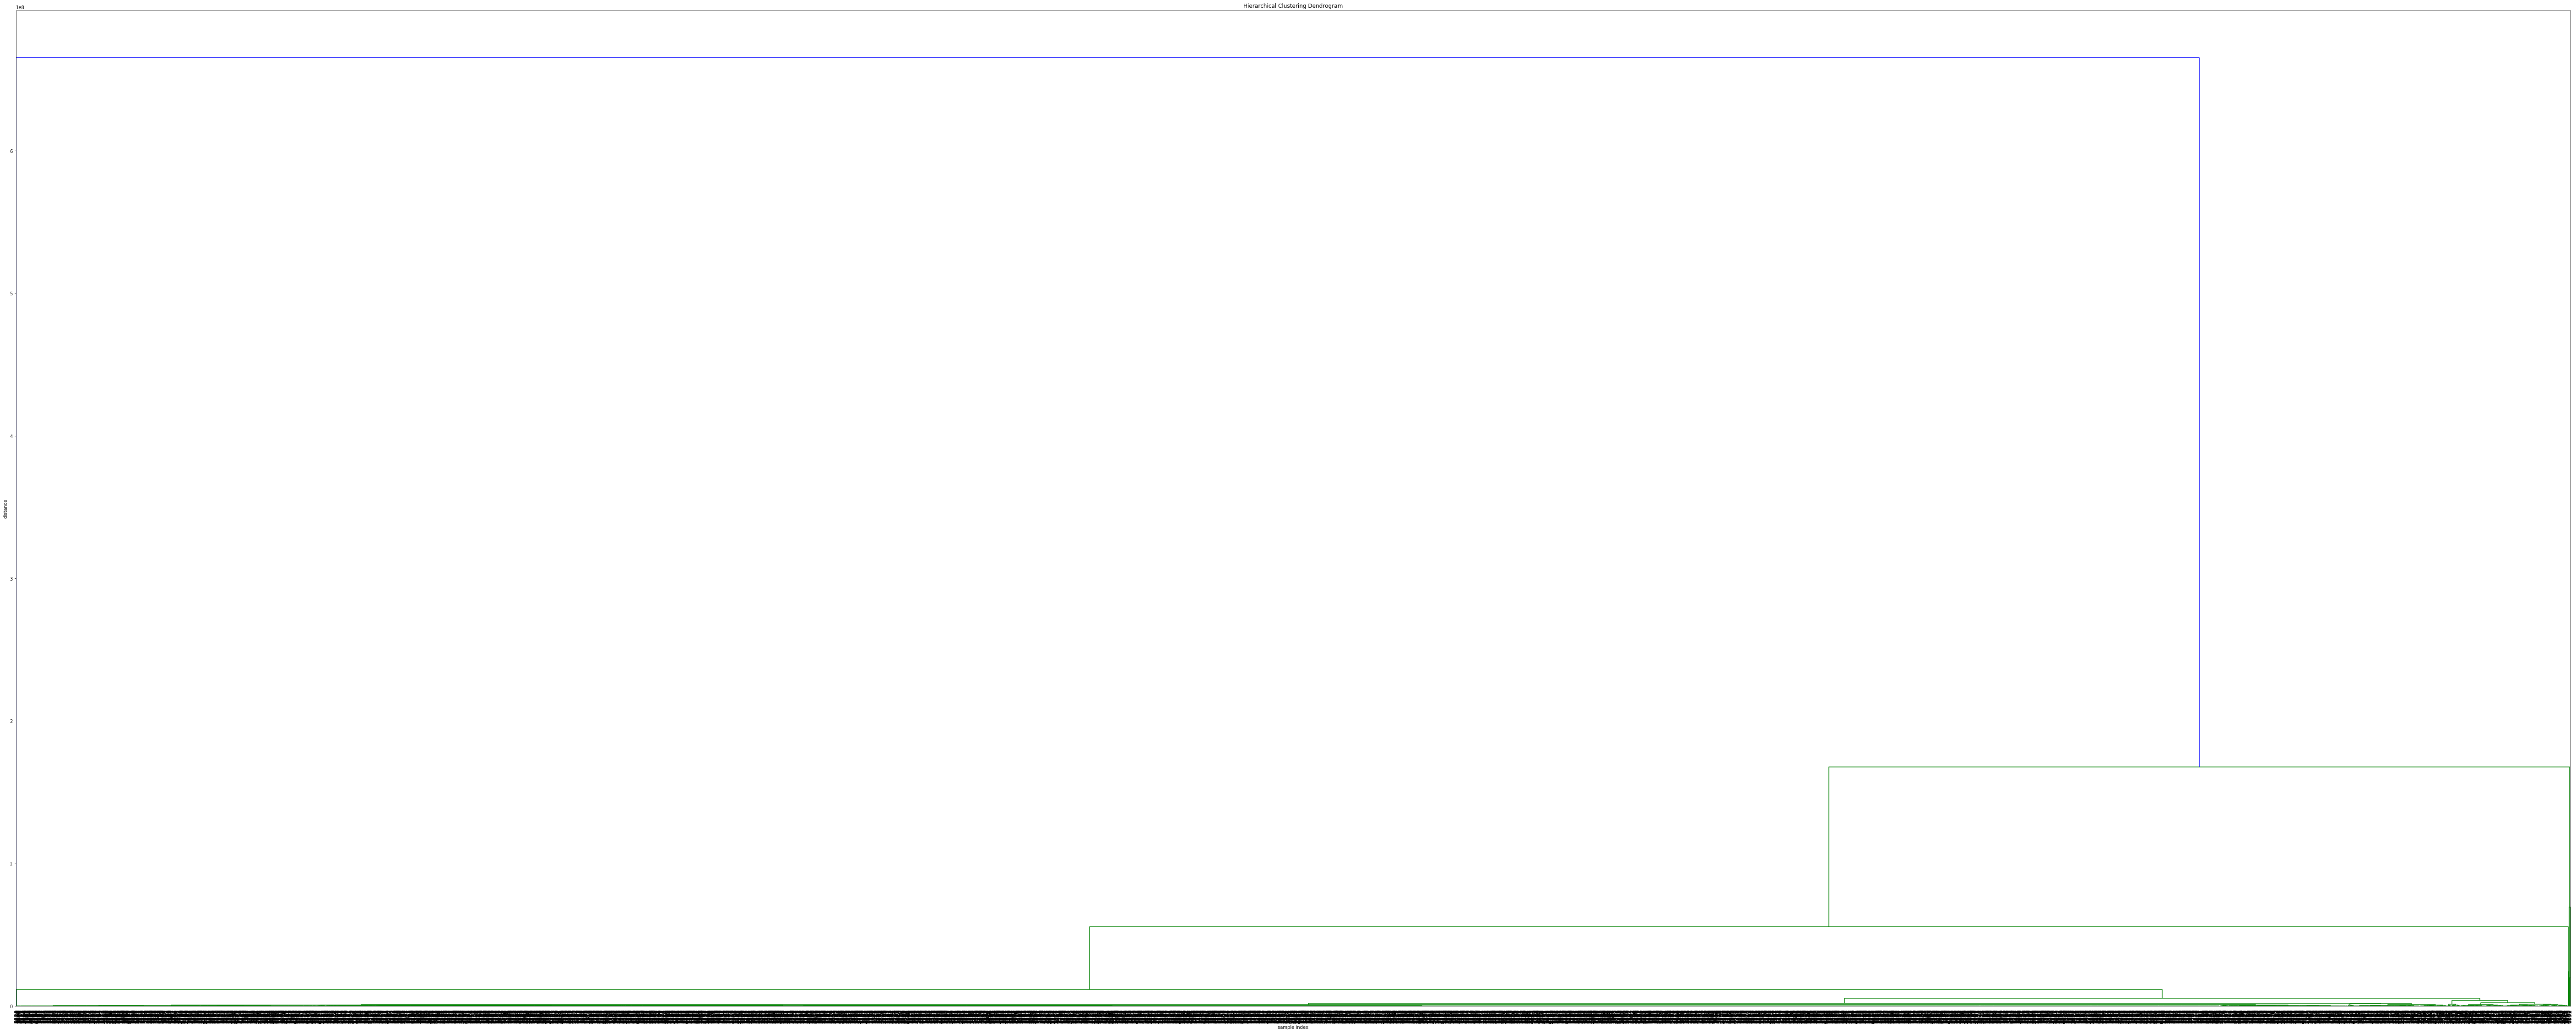

In [130]:
linktype = 'complete'
metric = 'euclidean'
make_dendrogram(subset, linktype, metric, color_threshold=None)